In [22]:
# VERİ SETİNİ GETİRME
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

data = sns.load_dataset("tips")
df = pd.DataFrame(data)

# Eksik Verileri Ortalama ile Doldurma
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(df[["total_bill"]])
df[["total_bill"]] = imputer.transform(df[["total_bill"]])

# Kategorik Olmayan Değişkenler
total_bill = df[["total_bill"]]
tip = df[["tip"]]
size = df[["size"]]

# Ktegorik Değişkenler İçin 0-1 Dönüşümü
smoker = pd.get_dummies(df[["smoker"]])
time = pd.get_dummies(df[["day"]])

# Kukla Değişkeni Silme
smoker = smoker.drop("smoker_Yes", axis=1)

# Verileri Birleştirme
new_data = pd.concat([total_bill, size, smoker, time, tip], axis=1)

# Train ve Test Belirleme
training = new_data.iloc[:, 0:1]
testing = new_data.iloc[:, 7:8]

# Train Test Ayırma
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(training, testing, test_size=0.30, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = linear_reg.predict(x_test)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

print("Train R2 Score: ", r2_score(y_train, linear_reg.predict(x_train)))
print("Test R2 Score: ", r2_score(y_test, linear_reg.predict(x_test)))

print("Ortalama Test Hatası: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Ortalama Train Hatası: ", np.sqrt(mean_squared_error(y_train, linear_reg.predict(x_train))))

print("Sabit Katsayı: ", linear_reg.intercept_[0])
print("Ağırlıklar: ", linear_reg.coef_)

Train R2 Score:  0.45555590764504406
Test R2 Score:  0.4291782688312412
Ortalama Test Hatası:  0.86743935521794
Ortalama Train Hatası:  1.0783029500384542
Sabit Katsayı:  0.8769576391532707
Ağırlıklar:  [[0.10889371]]


In [28]:
deger = int(input("Toplam Ücreti Giriniz: "))
print("Tahmin: ", linear_reg.intercept_[0] + linear_reg.coef_[:, 0] * deger)

Toplam Ücreti Giriniz: 15
Tahmin:  [2.51036328]


In [44]:
y_pred = pd.DataFrame(data=y_pred, index=range(len(y_pred)), columns=["Tahmin"])

y_test.index = y_pred.index
comparison = pd.concat([y_pred, y_test], axis=1)

print(comparison)

      Tahmin   tip
0   3.035231  3.18
1   1.831955  2.00
2   3.550298  2.00
3   3.696216  5.16
4   2.292576  2.00
..       ...   ...
69  3.547031  3.48
70  3.029786  2.00
71  3.942316  3.00
72  2.759730  2.71
73  3.016719  3.00

[74 rows x 2 columns]


### GÖRSELLEŞTİRME

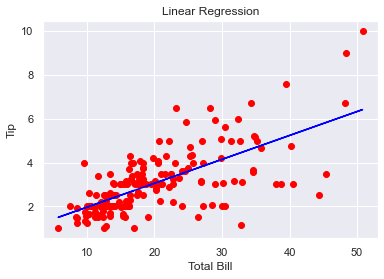

In [106]:

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, linear_reg.predict(x_train), color = 'blue')

plt.title('Linear Regression')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()
